In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

0 amplitudes: 0.98035 0
1 amplitudes: 0.73005 0
2 amplitudes: 0.28948 0
3 amplitudes: 0.16164 0
4 amplitudes: 0.19879 0
5 amplitudes: 0.07797 0
6 amplitudes: 0.05141 0
7 amplitudes: 0.02657 0
8 amplitudes: 0.01158 0
9 amplitudes: 0.01104 0


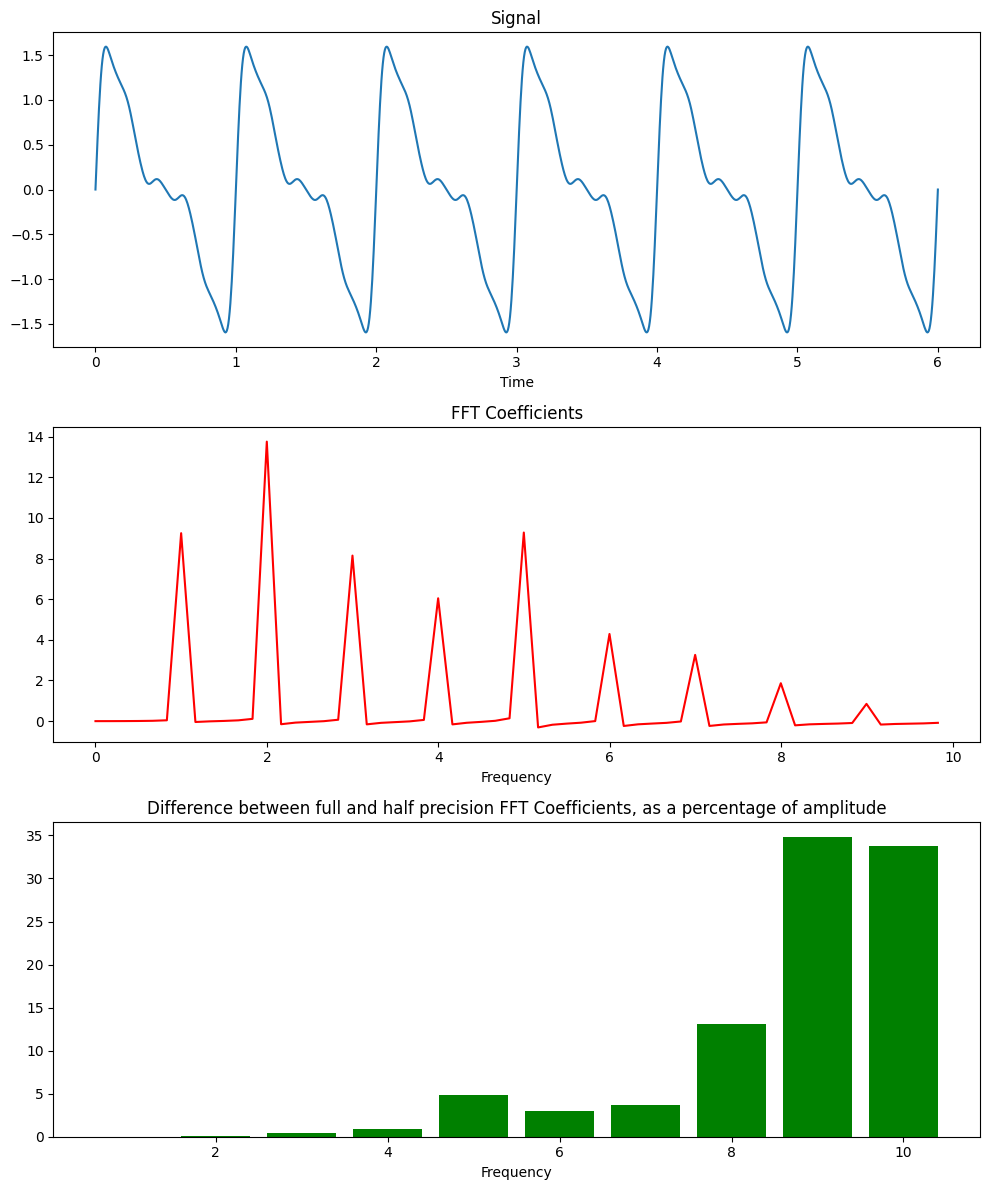

In [3]:
# Create a time series

max_t = 6
sample_rate = 200
t = np.linspace(0, max_t, max_t*sample_rate)

# Define the number of waves
num_frequencies = 10
decay_factor = .5

# Generate a signal as a sum of several sine and cosine waves 
# with amplitudes sampled from an exponential distribution
y = np.zeros_like(t)
amplitudes = []
for i in range(num_frequencies):
    sine_amp = np.exp(-decay_factor*i)*np.maximum(.1,np.random.normal(1,.3))
    cosine_amp = np.exp(-decay_factor*i)*np.maximum(.1,np.random.normal(1,.3))
    cosine_amp = 0
    amplitudes.append((sine_amp, cosine_amp))
    y += sine_amp * np.sin((i+1)*t * 2 * np.pi)
    y += cosine_amp * np.cos((i+1)*t* 2 * np.pi)

# Perform FFT in full and half precision
fft_full_precision = np.fft.fft(y).real
fft_half_precision = np.fft.fft(y.astype(np.float16)).real.astype(np.float16)
frequencies = np.fft.fftfreq(len(y), d=t[1]-t[0])

diff = fft_full_precision.astype(np.float16) - fft_half_precision

for i in range(num_frequencies):
    print(i, 'amplitudes:', np.round(amplitudes[i][0],5),np.round(amplitudes[i][1],5))
    #print('precision difference', np.abs(y_fft))


# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot original signal
ax[0].plot(t, y)
ax[0].set_title('Signal')
ax[0].set_xlabel('Time')

k = 10* max_t
ax[1].plot(frequencies[:k], fft_full_precision[:k], label='full precision',color="red")
#ax[1].plot(frequencies[:k], fft_half_precision[:k], label='half precision')
ax[1].set_title('FFT Coefficients')
ax[1].set_xlabel('Frequency')
#ax[1].legend()

# Plot difference

# frequencies goes from 0 to 10
# diff goes from 0 to .002

bins = [i for i in range(num_frequencies)]
bin_values = [0 for _ in range(num_frequencies)]
idx = 0
for b in bins:
    while frequencies[idx] < b+1 and idx < k:
        #print(b)
        bin_values[b] += np.abs(diff[idx])
        idx += 1

bin_percents = [bin_values[i]/amplitudes[i][0]*100 for i in bins]

ax[2].bar([b + 1 for b in bins], bin_percents, color="green") #, width=1.0)
ax[2].set_title('Difference between full and half precision FFT Coefficients, as a percentage of amplitude')
ax[2].set_xlabel('Frequency')

#ax[2].plot(frequencies[:k], diff[:k])
#ax[2].set_title('Difference between full and half precision FFT')
#ax[2].set_xlabel('Frequency')



plt.tight_layout()
plt.savefig('freq_mode_analysis.pdf')
plt.show()
